# ***1. Retuns***

In [1]:
import numpy as np
import pandas as pd
import yfinance
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera

[*********************100%***********************]  1 of 1 completed


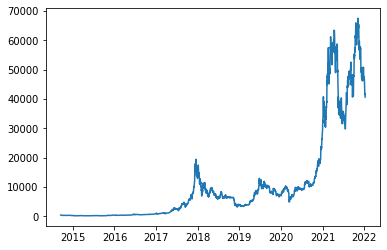

In [139]:
btc = yfinance.download(tickers= "BTC-USD", period= "max")
btc = pd.DataFrame(btc["Close"])
plt.plot(btc)

### Percentage Return

For calculate percentage return $R_t$ get the prices $P_t$ and $P_{t+1}$ for late apply one of these fomulates:

$$
R_t = \frac{P_{t+1} - P_{t}}{P_{t}} = \frac{P_{t+1}}{P_t} - 1
$$

In [11]:
def AssetReturn(Asset):
    return (Asset.diff()/Asset[1:len(Asset)]).dropna()

AssetReturn(btc).head()

,Close
Date,
2014-09-18,-0.077500
2014-09-19,-0.075087
2014-09-20,0.034502
2014-09-21,-0.025282
2014-09-22,0.008283


Note that the percentage returns are not normal distribution even if it seems, becouse the support of distribution is $[-1, \infty)$

Text(0.5, 1.0, 'Percentage Retuns')

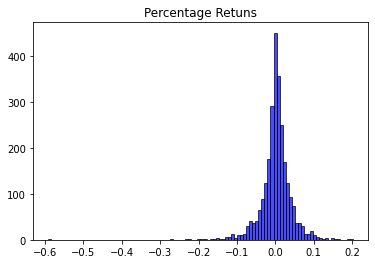

In [53]:
plt.hist(AssetReturn(btc), bins = 100, lw=1, ec="black", fc="blue", alpha=0.7)
plt.title("Percentage Retuns")

### Log Return

For alliviate of non-normality problem we can calculate the log-return $r_t$:

$$
r_t = \log \frac{P_{t+1}}{P_t} = \log P_{t+1} - \log P_{t}
$$

In [47]:
def logAssetReturn(Asset):
    return np.log(Asset).diff().dropna()

logAssetReturn(btc).head()

,Close
Date,
2014-09-18,-0.074643
2014-09-19,-0.072402
2014-09-20,0.035111
2014-09-21,-0.024968
2014-09-22,0.008317


Text(0.5, 1.0, 'Log Retuns')

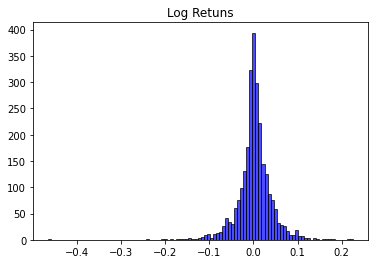

In [55]:
plt.hist(logAssetReturn(btc), bins = 100, lw=1, ec="black", fc="blue", alpha=0.7)
plt.title("Log Retuns")

### Stats and Normality

$$
\mu = \frac{\sum_{i=1}^{n} X_i}{n}
$$
$$
\sigma^2 = \frac{\sum_{i=1}^{n} (X_i - \mu)^2}{n}
$$
$$
S = \frac{\frac{1}{n} \sum_{i=1}^{n}  (X_i - \mu)^3}{(\frac{1}{n} \sum_{i=1}^{n}  (X_i - \mu)^{2})^\frac{3}{2}}
$$
$$
K = \frac{\frac{1}{n} \sum_{i=1}^{n}  (X_i - \mu)^4}{(\frac{1}{n} \sum_{i=1}^{n}  (X_i - \mu)^{2})^2}
$$
$$
JB = \frac{n}{6} \left( S^2 + \frac{1}{4} (K-2)^2 \right)
$$

In [135]:
def descibeAsset(Asset):
    JBtest = jarque_bera(Asset)
    print("Mean: {} / Std: {} / Assimetry: {} / Kurtosis: {} / Jarque-Bera: {} / JB P-value: {}".format(np.mean(Asset), np.std(Asset), JBtest[2], JBtest[3], JBtest[0], JBtest[1]))

descibeAsset(np.random.normal(2, 5, 1000))

Mean: 2.193962326884659 / Std: 5.056684367589982 / Assimetry: 0.0012958080355786191 / Kurtosis: 3.1052973145560934 / Jarque-Bera: 0.46226003860771475 / JB P-value: 0.7936362712912245


In [134]:
descibeAsset(AssetReturn(btc["Close"]))
descibeAsset(logAssetReturn(btc["Close"]))

Mean: 0.0009108179153313825 / Std: 0.04004729353831798 / Assimetry: -1.7018259712076416 / Kurtosis: 24.727344209905358 / Jarque-Bera: 53827.58713909739 / JB P-value: 0.0
Mean: 0.0016901249024657132 / Std: 0.03923463069859213 / Assimetry: -0.7979029902214887 / Kurtosis: 14.25433058909096 / Jarque-Bera: 14379.61270950963 / JB P-value: 0.0
